In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
import pickle

pd.options.display.max_seq_items = 2000

In [3]:
openfile=open( r"C:\Users\Joseph\Documents\Beamly\TakeHomeTask\beamly_case_study_noNaNs.pickle", "rb")
df=pickle.load(openfile)
openfile.close()

In [4]:
df.shape

(27091, 13)

In [5]:
df.head()

,date,avg_hour,min_hour,max_hour,device_name,productBand,avg_price,total_products,num_orders,city,region,County,Country
1,2018-07-12,20.0,20,20,Mobile,between20and30,29.95,1.0,1,Redbourn,Hertfordshire,Hertfordshire,England
2,2018-08-05,22.0,22,22,Desktop and Laptop,between20and30,27.95,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
3,2018-07-13,14.0,14,14,Mobile,between20and30,27.95,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
5,2018-08-10,19.0,19,19,Tablet,lessThan10,9.95,1.0,1,Bearsden,East Dunbartonshire,missing_county,missing_country
6,2018-07-12,17.0,17,17,Desktop and Laptop,between20and30,29.95,1.0,1,Greenwich,Greenwich,missing_county,missing_country


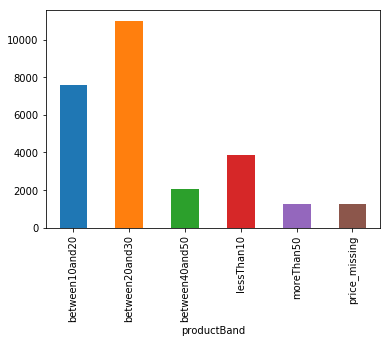

In [7]:
df.groupby(['productBand']).count()['date'].plot.bar()

Note: I realise that price_missing could be replaced, but I don't think it is necessary. It means that extra information is stored in the dataframe this way. Also the productBand column is redundant otherwise (as it can easily be reproduced with avg_price).

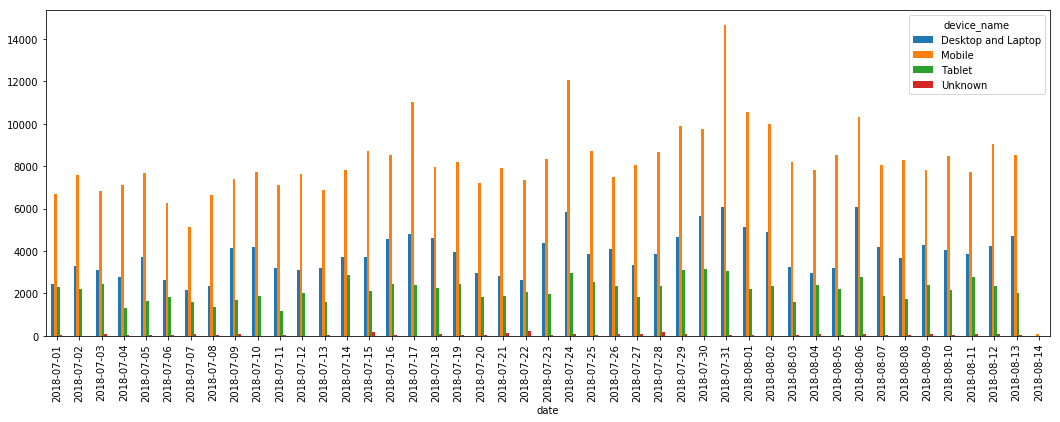

In [8]:
f, ax = plt.subplots(1,figsize=(18,6))

device_date=df.groupby(by=['device_name', 'date']).sum()['avg_price'].unstack(0).plot(kind='bar', ax=ax)

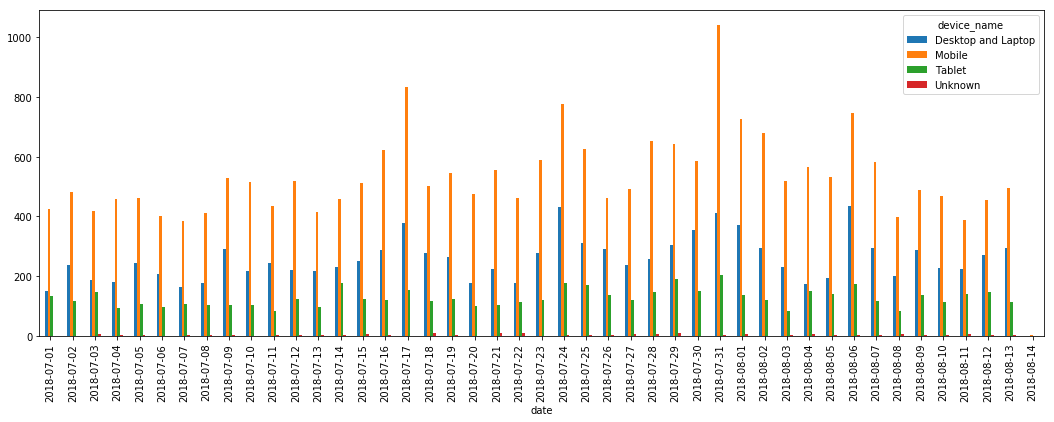

In [9]:
f, ax = plt.subplots(1,figsize=(18,6))

device_date=df.groupby(by=['device_name', 'date']).sum()['total_products'].unstack(0).plot(kind='bar', ax=ax)

Note: the two graphs above have very different trends for the last two weeks, because of the way the data was imputed. The total_products trend is more accurate

We only want to do short term forecasting, the best way t do that is to presume that there is a weekly and monthly trend that needs to be taken into account and forecast based on this. First want to find any weekly trend.

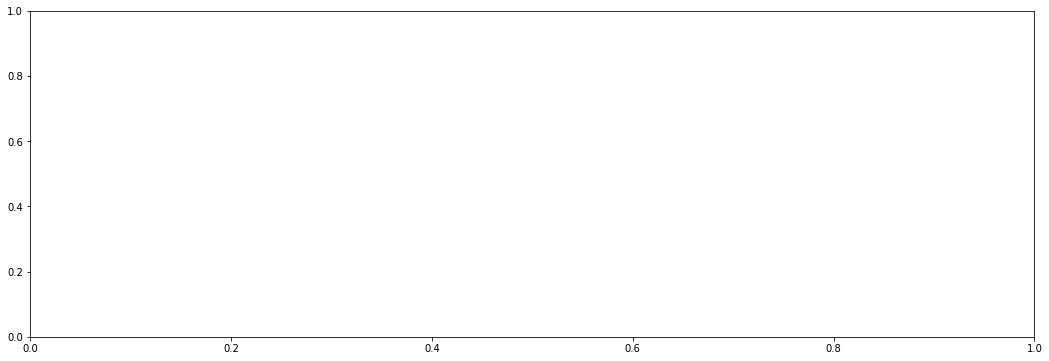

In [13]:

df_e=df
df_e['weekday']=df['date'].apply(lambda x:pd.to_datetime(x).weekday())
device_date=df_e.groupby(by=['device_name', 'weekday']).sum()['total_products'].unstack(0)

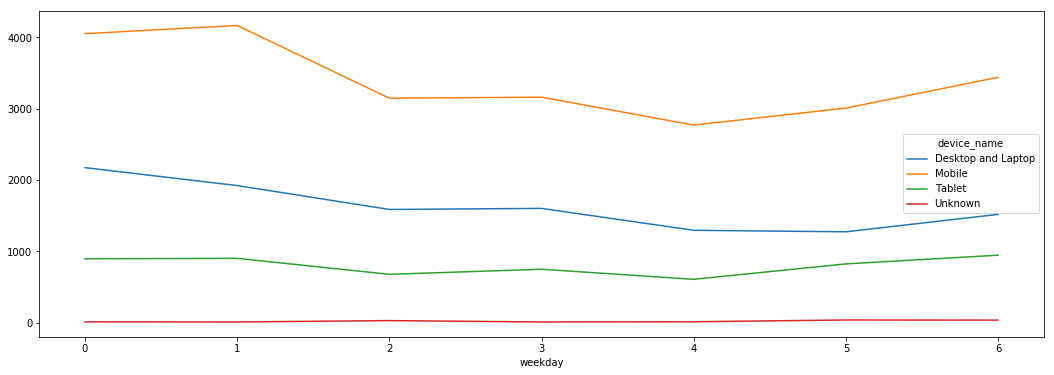

In [17]:
f, ax = plt.subplots(1,figsize=(18,6))
device_date.plot(ax=ax)

Remove this signal from the monthly data. Then find the monthly trend and combine them.